<a href="https://colab.research.google.com/github/tarumi283/tarumi/blob/main/%CE%94%CE%94CT%E6%B3%95_%E5%8A%B9%E7%8E%87%E7%A2%BA%E8%AA%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ターゲット遺伝子のPCR効率: 98.03%
ハウスキーピング遺伝子のPCR効率: 96.84%
PCR効率はΔΔCt法の条件を満たしています（効率差 < 5%）。


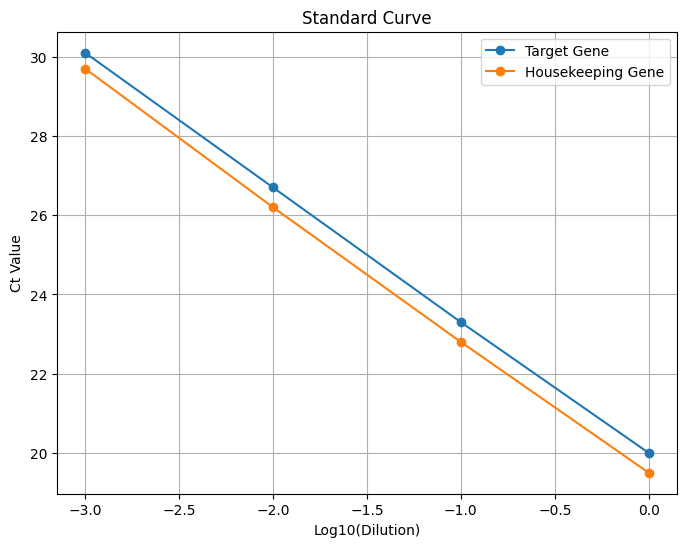

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# サンプルデータ（検量線のCt値と対応する濃度）
data = {
    'Dilution': [1, 0.1, 0.01, 0.001],  # 希釈倍率
    'Target_Ct': [20.0, 23.3, 26.7, 30.1],  # ターゲット遺伝子のCt値
    'Housekeeping_Ct': [19.5, 22.8, 26.2, 29.7]  # ハウスキーピング遺伝子のCt値
}

# データフレームの作成
df = pd.DataFrame(data)

# Ct値をもとに濃度の対数を計算
df['Log_Dilution'] = np.log10(df['Dilution'])

# 線形回帰で傾きを計算（TargetとHousekeepingそれぞれ）
target_slope, target_intercept = np.polyfit(df['Log_Dilution'], df['Target_Ct'], 1)
housekeeping_slope, housekeeping_intercept = np.polyfit(df['Log_Dilution'], df['Housekeeping_Ct'], 1)

# PCR効率を計算
target_efficiency = (10 ** (-1 / target_slope)) - 1
housekeeping_efficiency = (10 ** (-1 / housekeeping_slope)) - 1

# 結果の表示
print("ターゲット遺伝子のPCR効率: {:.2f}%".format(target_efficiency * 100))
print("ハウスキーピング遺伝子のPCR効率: {:.2f}%".format(housekeeping_efficiency * 100))

# 効率の差を確認
if abs(target_efficiency - housekeeping_efficiency) < 0.05:
    print("PCR効率はΔΔCt法の条件を満たしています（効率差 < 5%）。")
else:
    print("PCR効率が異なります（効率差 >= 5%）。ΔΔCt法には不適切です。")

# 検量線をプロット
plt.figure(figsize=(8, 6))
plt.plot(df['Log_Dilution'], df['Target_Ct'], 'o-', label='Target Gene')
plt.plot(df['Log_Dilution'], df['Housekeeping_Ct'], 'o-', label='Housekeeping Gene')
plt.xlabel('Log10(Dilution)')
plt.ylabel('Ct Value')
plt.title('Standard Curve')
plt.legend()
plt.grid()
plt.show()